# Exploratory Data Analysis on Climate Change Data Set

In this project, I took upon myself to analyze a real-world data set using `pandas` library. In particular, I'll explore data related to the most important challenge of our time: climate change. This project consider historic changes in surface temperatures around the world using [data](https://www.fao.org/faostat/en/#data/ET) originally from the Food and Agriculture Organization (FAO) of the UN.

## 1. Description of the Dataset

The dataset used in this project was compiled from the UN's FAO and can be downloaded [here](https://climatedata.imf.org/datasets/4063314923d74187be9596f10d034914_0/about). This dataset contains annual estimates of the changes in surface temperatures (in degrees Celcius) from the baseline period across multiple regions. It spans from year 1961 to 2023 and covering over 200 countries.

Next step is to import `pandas` library and read the data set from the csv file (`Annual_Surface_Temperature_Change.csv`).

In [1]:
# import pandas library
import pandas as pd

In [2]:
# read the data and show several rows
df = pd.read_csv('Annual_Surface_Temperature_Change.csv')
df.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate and Weath...",...,0.521,1.204,1.612,1.642,1.624,0.991,0.587,1.475,2.154,1.956
1,2,Africa,NaN,AFRTMP,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate and Weath...",...,1.013,1.190,1.392,1.180,1.178,1.297,1.200,1.396,0.996,1.485
2,3,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate and Weath...",...,1.285,1.667,1.558,1.196,2.103,1.751,1.567,1.589,1.585,2.122
3,4,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate and Weath...",...,1.713,1.153,1.787,1.533,1.231,1.107,1.905,2.360,1.776,2.274
4,5,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate and Weath...",...,0.840,0.679,1.209,1.105,0.859,1.209,1.101,0.938,0.925,0.951


In [129]:
# show the basic informations of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 0 to 235
Data columns (total 73 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  228 non-null    object 
 1   ISO2     227 non-null    object 
 2   ISO3     228 non-null    object 
 3   1961     228 non-null    float64
 4   1962     228 non-null    float64
 5   1963     228 non-null    float64
 6   1964     228 non-null    float64
 7   1965     228 non-null    float64
 8   1966     228 non-null    float64
 9   1967     228 non-null    float64
 10  1968     228 non-null    float64
 11  1969     228 non-null    float64
 12  1970     228 non-null    float64
 13  1971     228 non-null    float64
 14  1972     228 non-null    float64
 15  1973     228 non-null    float64
 16  1974     228 non-null    float64
 17  1975     228 non-null    float64
 18  1976     228 non-null    float64
 19  1977     228 non-null    float64
 20  1978     228 non-null    float64
 21  1979     228 non-null

As seen above, the dataset contains mostly temperature change data separate into yearly columns. Furthermore, we can see there are some null values which need to be process later on.

## 2. Initial Plan for Data Exploration

I plan to explore the temperature trends over time globally and regionally. I'd like to investigate whether certain region(s) show greater warming trends. For that I'll use several visualization tools such as line plot, scatter plot, chloropleth map, etc. Furthermore, I'll also explore the distribution of temperature changes by decade to understand the long-term patterns.

## 3. Data Cleaning and Feature Engineering

Notice that most of the columns represent data for an individual year that yields a lot of columns. Furthermore, there are other columns that are not relevant to this analysis. Hence, I'll remove these columns and only keep the country name, ISO2 code, ISO3 code, and the yearly data.

In [3]:
# dropping irrelevant columns
df = df.drop(columns=['ObjectId', 'Indicator', 'Unit', 
                      'Source', 'CTS Code', 'CTS Name', 
                      'CTS Full Descriptor'])
df.head()

,Country,ISO2,ISO3,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"Afghanistan, Islamic Rep. of",AF,AFG,-0.126,-0.173,0.844,-0.751,-0.220,0.239,-0.348,...,0.521,1.204,1.612,1.642,1.624,0.991,0.587,1.475,2.154,1.956
1,Africa,NaN,AFRTMP,-0.017,-0.036,0.063,-0.156,-0.201,0.138,-0.215,...,1.013,1.190,1.392,1.180,1.178,1.297,1.200,1.396,0.996,1.485
2,Albania,AL,ALB,0.635,0.342,0.086,-0.169,-0.390,0.553,-0.082,...,1.285,1.667,1.558,1.196,2.103,1.751,1.567,1.589,1.585,2.122
3,Algeria,DZ,DZA,0.155,0.120,0.050,0.254,-0.111,0.405,-0.024,...,1.713,1.153,1.787,1.533,1.231,1.107,1.905,2.360,1.776,2.274
4,American Samoa,AS,ASM,0.121,0.000,0.211,-0.089,-0.595,0.129,-0.387,...,0.840,0.679,1.209,1.105,0.859,1.209,1.101,0.938,0.925,0.951


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Country     0
ISO2        8
ISO3        0
1961       35
1962       34
           ..
2019       14
2020       16
2021       13
2022       13
2023       15
Length: 66, dtype: int64


There are dozens of missing values in each yearly temperature column. This missing value can be fill using the average temperature around that country's region since its temperature will probably similar to other countries in the same region. Hence, we need information on the region of each country. For that, I used external data sources to map ISO3 code of each country to regions and add a region column to the dataframe.

In [5]:
# read iso country codes file
iso_country_codes = pd.read_csv('iso_country_codes.csv')
iso_country_codes.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [6]:
# we only need the ISO3 code (alpha-3 column) and region
iso_region = pd.DataFrame()
iso_region[['ISO3', 'Region']] = iso_country_codes[['alpha-3', 'region']]
iso_region.head()

,ISO3,Region
0,AFG,Asia
1,ALA,Europe
2,ALB,Europe
3,DZA,Africa
4,ASM,Oceania


In [7]:
# now we can merge iso_region dataframe to our main dataframe
df = df.merge(iso_region, how='left', on='ISO3', validate='1:1')
df.head()

,Country,ISO2,ISO3,1961,1962,1963,1964,1965,1966,1967,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Region
0,"Afghanistan, Islamic Rep. of",AF,AFG,-0.126,-0.173,0.844,-0.751,-0.220,0.239,-0.348,...,1.204,1.612,1.642,1.624,0.991,0.587,1.475,2.154,1.956,Asia
1,Africa,NaN,AFRTMP,-0.017,-0.036,0.063,-0.156,-0.201,0.138,-0.215,...,1.190,1.392,1.180,1.178,1.297,1.200,1.396,0.996,1.485,NaN
2,Albania,AL,ALB,0.635,0.342,0.086,-0.169,-0.390,0.553,-0.082,...,1.667,1.558,1.196,2.103,1.751,1.567,1.589,1.585,2.122,Europe
3,Algeria,DZ,DZA,0.155,0.120,0.050,0.254,-0.111,0.405,-0.024,...,1.153,1.787,1.533,1.231,1.107,1.905,2.360,1.776,2.274,Africa
4,American Samoa,AS,ASM,0.121,0.000,0.211,-0.089,-0.595,0.129,-0.387,...,0.679,1.209,1.105,0.859,1.209,1.101,0.938,0.925,0.951,Oceania


In [8]:
# Fill missing values with the region average
year_columns = [str(year) for year in range(1961, 2024)]

for year in year_columns:
    df[year] = df.groupby('Region')[year].transform(lambda x: x.fillna(x.mean()))

In [9]:
# Check if any missing values remain after filling by region
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Country    0
ISO2       8
ISO3       0
1961       8
1962       8
          ..
2020       8
2021       8
2022       8
2023       8
Region     8
Length: 67, dtype: int64


In [10]:
# These missing values are the data from each continent
df[df["Region"].isnull()]

,Country,ISO2,ISO3,1961,1962,1963,1964,1965,1966,1967,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Region
1,Africa,NaN,AFRTMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Americas,NaN,AMETMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Antarctica,NaN,ATATMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Asia,NaN,ASIATMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,Europe,NaN,EURTMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,Oceania,NaN,OCETMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,Taiwan Province of China,TW,TWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,World,NaN,WLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# I'll drop all of those rows
df = df.dropna(subset=['Region'])
df.head()

,Country,ISO2,ISO3,1961,1962,1963,1964,1965,1966,1967,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Region
0,"Afghanistan, Islamic Rep. of",AF,AFG,-0.126,-0.173,0.844,-0.751,-0.220,0.239,-0.348,...,1.204,1.612,1.642,1.624,0.991,0.587,1.475,2.154,1.956,Asia
2,Albania,AL,ALB,0.635,0.342,0.086,-0.169,-0.390,0.553,-0.082,...,1.667,1.558,1.196,2.103,1.751,1.567,1.589,1.585,2.122,Europe
3,Algeria,DZ,DZA,0.155,0.120,0.050,0.254,-0.111,0.405,-0.024,...,1.153,1.787,1.533,1.231,1.107,1.905,2.360,1.776,2.274,Africa
4,American Samoa,AS,ASM,0.121,0.000,0.211,-0.089,-0.595,0.129,-0.387,...,0.679,1.209,1.105,0.859,1.209,1.101,0.938,0.925,0.951,Oceania
6,"Andorra, Principality of",AD,AND,0.756,0.120,-0.744,0.315,-0.489,0.414,0.636,...,1.631,1.918,1.854,1.835,1.884,2.480,1.450,3.155,2.786,Europe


Now that our data doesn't have any missing value, We can calculate and add additional columns for decade-wise average temperature changes for each country.

In [12]:
# creating the decade range
year_columns = [str(year) for year in range(1961, 2021)]
decades = list()
for i in range(6):
    decades.append(year_columns[10*i:10*i+10])
print(decades)

[['1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970'], ['1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980'], ['1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990'], ['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000'], ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010'], ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']]


In [13]:
# calculating the average value for each range
for i in range(6):
    df[decades[i][0] + 's'] = df[decades[i]].mean(axis=1)
df.head()

,Country,ISO2,ISO3,1961,1962,1963,1964,1965,1966,1967,...,2021,2022,2023,Region,1961s,1971s,1981s,1991s,2001s,2011s
0,"Afghanistan, Islamic Rep. of",AF,AFG,-0.126,-0.173,0.844,-0.751,-0.220,0.239,-0.348,...,1.475,2.154,1.956,Asia,-0.0603,0.0311,0.3614,0.43600,1.159100,1.1252
2,Albania,AL,ALB,0.635,0.342,0.086,-0.169,-0.390,0.553,-0.082,...,1.589,1.585,2.122,Europe,0.0864,-0.2114,0.1150,0.39080,0.884500,1.5192
3,Algeria,DZ,DZA,0.155,0.120,0.050,0.254,-0.111,0.405,-0.024,...,2.360,1.776,2.274,Africa,0.1111,-0.1087,0.6477,0.75880,1.421900,1.4219
4,American Samoa,AS,ASM,0.121,0.000,0.211,-0.089,-0.595,0.129,-0.387,...,0.938,0.925,0.951,Oceania,-0.0684,0.0211,0.3159,0.41563,0.731267,0.9415
6,"Andorra, Principality of",AD,AND,0.756,0.120,-0.744,0.315,-0.489,0.414,0.636,...,1.450,3.155,2.786,Europe,0.0961,-0.1506,0.6230,0.88280,1.140800,1.7252


## 4. Findings and Insights

Now that the data is clean and we've added decade average features, we are ready to plot the data.

In [14]:
# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# import interact library for interactive plotting
from ipywidgets import interact

In [15]:
# function for plotting a line plot for one country
def lineplot(iso):
    plt.figure(figsize=(10,6))
    data = df[df['ISO3'] == iso][[str(year) for year in range(1961, 2024)]]
    sns.lineplot(x=data.columns, y=data.values[0])
    title = 'Temperature Change in ' + df[df['ISO3'] == iso]['Country'].values[0] + ' from 1961 to 2023'
    plt.title(title)
    plt.ylabel('Temperature Change (°C)')
    plt.xlabel('Year')
    plt.xticks(rotation=90)
    plt.show()

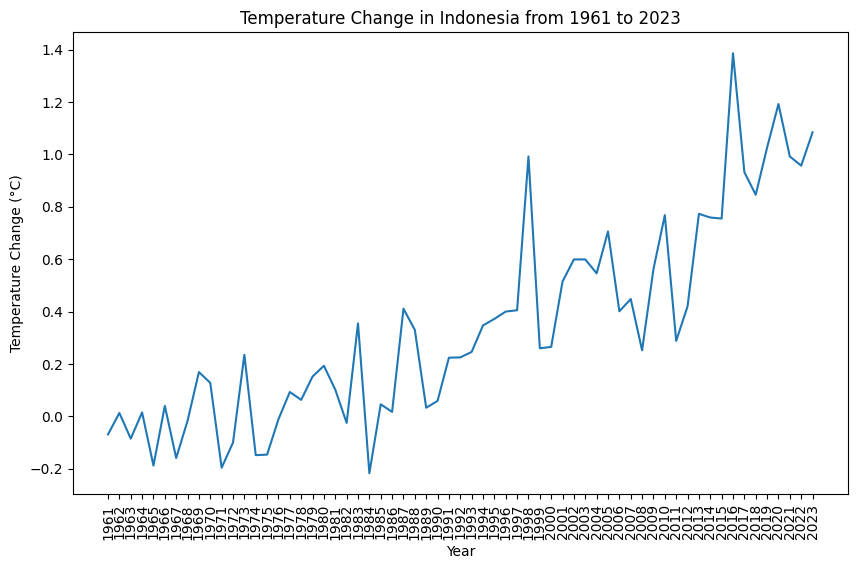

In [16]:
# use the function above to plot temperature change in any country
# using its ISO3 code, e.g. Indonesia ('IDN')
lineplot('IDN')

By changing the ISO3 code in the function's argument above, we can observed visually how the temperature change increase for every country around the world. Furthermore, the rate of increase seems to be increasing as well almost similar to an exponential curve.

In [17]:
# We also interested with the regional data
df_region = df.loc[:,'1961':].groupby('Region').mean()
df_region

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2020,2021,2022,2023,1961s,1971s,1981s,1991s,2001s,2011s
Region,,,,,,,,,,,,,,,,,,,,,
Africa,0.061537,-0.031741,0.017426,-0.130815,-0.244667,0.114185,-0.137000,-0.219889,0.318833,0.256167,...,1.252833,1.283607,1.019875,1.424127,0.000404,0.071733,0.355297,0.526563,0.888590,1.101214
Americas,0.024333,-0.102122,0.090082,-0.073229,-0.157458,-0.003208,-0.175283,-0.186109,0.267435,0.093326,...,1.337791,1.048909,0.883795,1.465419,-0.022223,0.049430,0.290972,0.561530,0.779574,1.007022
Asia,-0.027625,0.174707,0.202275,-0.229050,-0.125590,0.407073,-0.320024,-0.289220,0.164073,0.192775,...,1.474122,1.590898,1.524816,1.729102,0.014940,-0.014748,0.126970,0.437699,0.939135,1.191090
Europe,0.862613,-0.241645,-0.538516,0.024387,-0.482710,0.034806,0.340516,-0.151516,-0.280452,-0.319484,...,2.219000,1.483417,2.147562,2.288187,-0.075200,-0.018461,0.292519,0.697769,1.156716,1.672029
Oceania,0.081150,0.068789,-0.036632,0.060211,-0.364632,-0.161900,-0.155684,-0.188895,0.016556,0.190167,...,1.026389,0.862167,0.952889,0.903000,-0.049087,0.036868,0.205347,0.258792,0.525515,0.800400


In [18]:
# There are only 5 regions
df_region.index.values

array(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'], dtype=object)

In [19]:
# function for plotting a line plot for region(s)
def regionplot(year=True):
    """ This plotting function used to plot a line plot for
    regional temperature change data. The function accept one
    argument with boolean value: if given None or True, then
    it will plot using yearly data; if given False, then it will
    plot using decade-wise data.
    """
    if year:
        cols = [str(year) for year in range(1961, 2024)]
        title = 'Temperature change in each region from 1961 to 2023'
        deg = 90
    else:
        cols = ['1961s', '1971s', '1981s', '1991s', '2001s', '2011s']
        title = 'Temperature change in each region in decades'
        deg = 0
    plt.figure(figsize=(10,6))
    data = df_region[cols]
    plt.plot(data.columns, data.values.T)
    plt.title(title)
    plt.ylabel('Temperature Change (°C)')
    plt.xlabel('Year')
    plt.xticks(rotation=deg)
    plt.legend(data.index.values)
    plt.show()

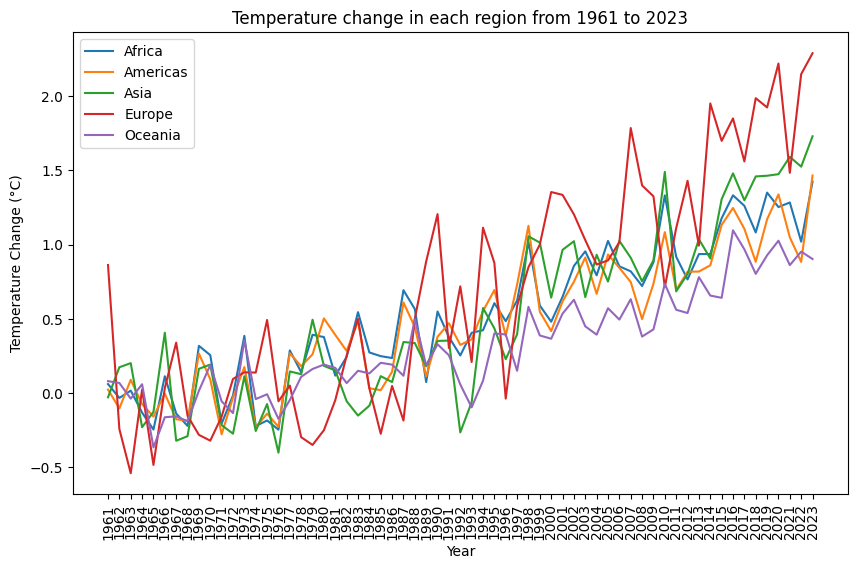

In [20]:
# plot regional average yearly temperature change data
regionplot()

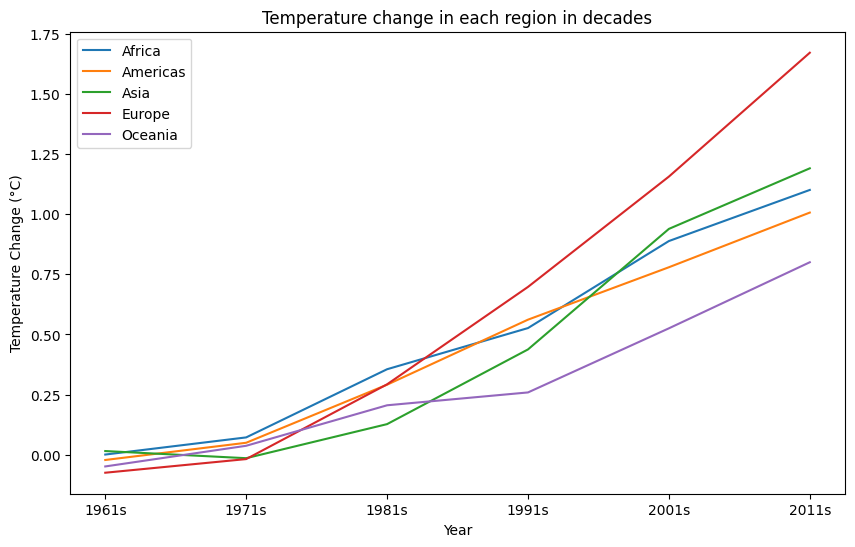

In [21]:
# plot regional average decade-wise temperature change data
regionplot(False)

The increasing trends are observed on these regional plots as well.

In [22]:
# Now for the global data
df_world = df.loc[:,'1961':].mean(numeric_only=True)
df_world

1961     0.204614
1962    -0.035642
1963    -0.048916
1964    -0.088038
1965    -0.262027
           ...   
1971s    0.025469
1981s    0.263058
1991s    0.523621
2001s    0.896067
2011s    1.190507
Length: 69, dtype: float64

In [24]:
# function for plotting a line plot for average world data
def worldplot(year=True):
    if year:
        cols = [str(year) for year in range(1961, 2024)]
        title = 'Temperature change over the world from 1961 to 2023'
        deg = 90
    else:
        cols = ['1961s', '1971s', '1981s', '1991s', '2001s', '2011s']
        title = 'Temperature change over the world in decades'
        deg = 0
    plt.figure(figsize=(10,6))
    data = df_world[cols]
    plt.plot(data.index, data.values.T)
    plt.title(title)
    plt.ylabel('Temperature Change (°C)')
    plt.xlabel('Year')
    plt.xticks(rotation=deg)
    plt.show()

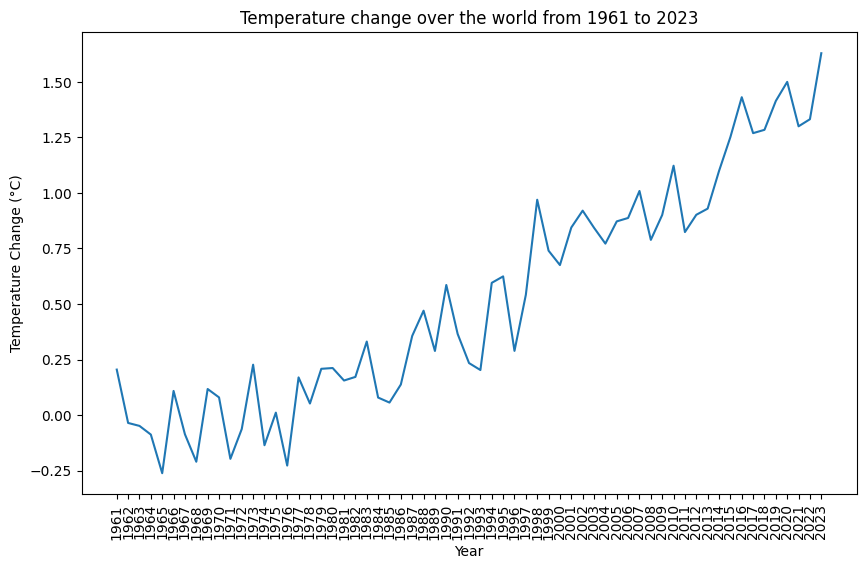

In [25]:
# plot global average yearly temperature change data
worldplot()

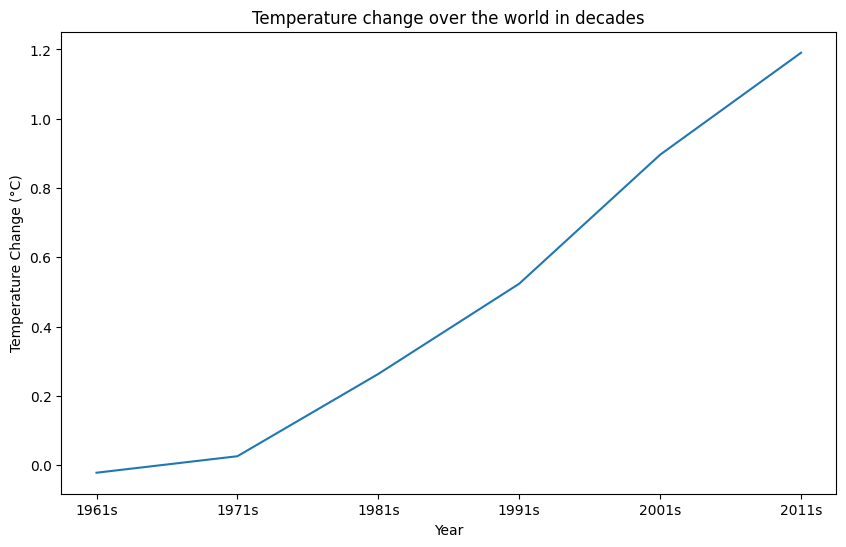

In [26]:
# plot global average decade-wise temperature change data
worldplot(False)

In [142]:
# Next, we are interested to see how the temperature change
# distributed in an individual year
def distyear(year=2023):
    plt.figure(figsize=(10,6))
    sns.displot(data=df, x=str(year), kde=True)
    plt.title(f'Temperature Change Distribution in {year}')
    plt.ylabel('Count')
    plt.xlabel('Temperature Change (°C)')
    plt.xlim(-2, 3)
    plt.show()

<Figure size 1000x600 with 0 Axes>

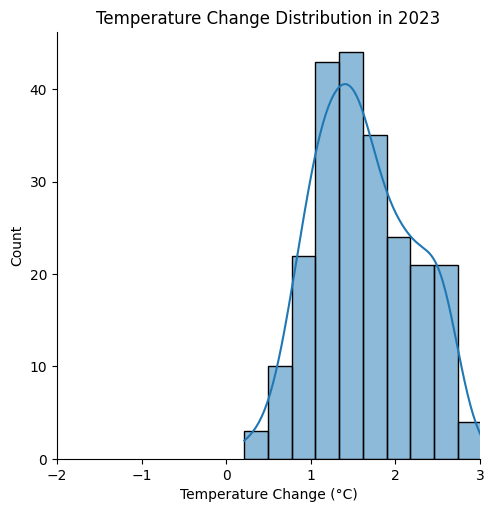

In [143]:
# Plot distribution plot for year 2023
distyear(2023)

In [144]:
# Using interact library, we can make sliding bar to input
# the argument into the function
interact(distyear, year=(1961, 2023, 5))

interactive(children=(IntSlider(value=2023, description='year', max=2023, min=1961, step=5), Output()), _dom_c…

<function __main__.distyear(year=2023)>

Looking at the interactive plot above, by sliding the bar we observed that the distribution of the temperature change is sliding to the right. In other words, the mean of our distribution is increasing.

Lastly, We want to create the chloropleth map of the global average temperature data to see how it's distributed on the map.

In [27]:
# import library geopandas
import geopandas as gpd

In [28]:
# read the map file
geo_data = gpd.read_file('World_Countries_Generalized.geojson')
geo_data.head()

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Length,SHAPE_Area,geometry
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35..."
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"MULTIPOLYGON (((19.57083 41.68527, 19.58195 41..."
2,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"MULTIPOLYGON (((4.60335 36.88791, 4.63555 36.8..."
3,4,American Samoa,AS,United States,US,0.600124,0.013720,"MULTIPOLYGON (((-170.7439 -14.37555, -170.7494..."
4,5,Andorra,AD,Andorra,AD,0.937352,0.055585,"MULTIPOLYGON (((1.44584 42.60194, 1.48653 42.6..."


In [31]:
# merge map data with the main dataframe column ISO2 and the decade-wise columns
geo_data = geo_data.merge(df[['ISO2', '1961s', '1971s', 
                             '1981s', '1991s', '2001s', 
                             '2011s']], 
                          left_on='ISO', right_on='ISO2', 
                          how='left')
geo_data.head()

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Length,SHAPE_Area,geometry,ISO2,1961s,1971s,1981s,1991s,2001s,2011s
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",AF,-0.0603,0.0311,0.3614,0.43600,1.159100,1.1252
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"MULTIPOLYGON (((19.57083 41.68527, 19.58195 41...",AL,0.0864,-0.2114,0.1150,0.39080,0.884500,1.5192
2,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"MULTIPOLYGON (((4.60335 36.88791, 4.63555 36.8...",DZ,0.1111,-0.1087,0.6477,0.75880,1.421900,1.4219
3,4,American Samoa,AS,United States,US,0.600124,0.013720,"MULTIPOLYGON (((-170.7439 -14.37555, -170.7494...",AS,-0.0684,0.0211,0.3159,0.41563,0.731267,0.9415
4,5,Andorra,AD,Andorra,AD,0.937352,0.055585,"MULTIPOLYGON (((1.44584 42.60194, 1.48653 42.6...",AD,0.0961,-0.1506,0.6230,0.88280,1.140800,1.7252


In [111]:
# function to create chloropleth map
decs = ['1961s', '1971s', '1981s', '1991s', '2001s', '2011s']
def geoplot(decades):
    geo_data.plot(column=str(decades)+'s', 
                  legend=True, 
                  missing_kwds={'color':'grey'}, 
                  cmap='OrRd', 
                  vmin=df[decs].min().min(),
                  vmax=df[decs].max().max(),
                  legend_kwds={'label': 'Average Temperature Change in the ' + str(decades) + 's' + ' (°C)', 
                               'orientation': 'horizontal'})

In [114]:
# I'd like to save each plot to a png file to create a gif file later on
file_names = list()
for year in range(1961, 2021, 10):
    geoplot(year)
    file_name = f'{year}.png'
    plt.savefig(file_name)
    file_names.append(file_name)
    plt.close()

In [118]:
# library to make gif file
import imageio.v2 as imageio

In [128]:
# creating the gif file
with imageio.get_writer('global_temp_change.gif', mode='I', 
                        duration=1000, loop=0) as writer:
    for file_name in file_names:
        image = imageio.imread(file_name)
        writer.append_data(image)

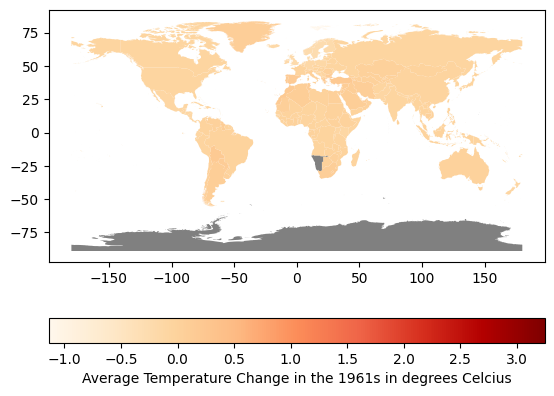

In [34]:
# plot the temperature changes for each decade
# (1961, 1971, 1981, 1991, 2001, 2011)
geoplot(1961)

In [36]:
# interactive map plot
interact(geoplot, decades=(1961, 2011, 10))

interactive(children=(IntSlider(value=1981, description='decades', max=2011, min=1961, step=10), Output()), _d…

<function __main__.geoplot(decades)>

## 5. Hypotheses

Based on the findings and insights above, some hypotheses can be formulated such as:
- Region closer to the poles experience greater temperature increases compared to the equatorial regions.
- The rate of temperature increase is accelerating over the recent decades.
- Region(s) with higher industrial activity show larger temperature increase compared to less industrialized regions.

## 6. Significance Test

In this section, I'll calculate the significance of each hypothesis. 

### The first hypothesis
The Null hypothesis (**H₀**) says there is no significant difference between regions closer to the poles and regions closer to the equator.

The Alternative hypothesis (**H₁**) says that the region closer to the poles experiences greater temperature increases compared to the equatorial regions.

In [45]:
# Select region closer to the poles
europe = df_region.loc['Europe'].values

# Select region in the equator
asia = df_region.loc['Asia'].values
africa = df_region.loc['Africa'].values
oceania = df_region.loc['Oceania'].values

In [46]:
# import statistics library
import scipy.stats as stats

In [50]:
def test(region1, region2):
    alpha=0.05
    t_value1, p_value1 = stats.ttest_ind(region1, region2)
    print(f"t_value1 = {t_value1:.4f}, p_value1 = {p_value1:.4f}")
    if p_value1 < alpha:
        print("We reject the null hypothesis: there is a significant difference between temperature changes in polar and equatorial regions.")
    else:
        print("We fail to reject the null hypothesis: no significant difference found.")

In [51]:
test(europe, asia)

t_value1 = 1.5532, p_value1 = 0.1227
We fail to reject the null hypothesis: no significant difference found.


In [52]:
test(europe, africa)

t_value1 = 1.4429, p_value1 = 0.1514
We fail to reject the null hypothesis: no significant difference found.


In [53]:
test(europe, oceania)

t_value1 = 3.5155, p_value1 = 0.0006
We reject the null hypothesis: there is a significant difference between temperature changes in polar and equatorial regions.


In [55]:
test(europe, (asia + africa + oceania)/3)

t_value1 = 2.1512, p_value1 = 0.0332
We reject the null hypothesis: there is a significant difference between temperature changes in polar and equatorial regions.


In [56]:
americas = df_region.loc['Americas'].values
test(europe, americas)

t_value1 = 1.9243, p_value1 = 0.0564
We fail to reject the null hypothesis: no significant difference found.


In [57]:
test(europe, (asia + africa + oceania + americas)/4)

t_value1 = 2.0996, p_value1 = 0.0376
We reject the null hypothesis: there is a significant difference between temperature changes in polar and equatorial regions.


In [58]:
test(europe, (asia + africa)/2)

t_value1 = 1.5103, p_value1 = 0.1333
We fail to reject the null hypothesis: no significant difference found.


Based on the results of the significance tests, we can infere several facts:

**Failing to Reject the Null Hypothesis (Europe vs. Asia, Africa, Americas):**

For the pairwise comparisons between **Europe** and the regions of **Asia**, **Africa**, and the **Americas**, the test failed to reject the null hypothesis. This means that, statistically, there is **no significant difference in temperature change** between Europe and these regions, which suggests that:
   - These regions may be experiencing **similar rates** of temperature change.
   - The difference in geographical locations (proximity to the poles vs. the equator) may not be as influential on temperature change for these specific regions.

**Rejecting the Null Hypothesis (Europe vs. Oceania and Europe vs. Average of Other Regions):**

For the comparisons between **Europe** and **Oceania** and between **Europe** and the **average of all four other regions**, the test rejected the null hypothesis, which indicates that:
   - **Europe and Oceania** are experiencing significantly **different rates of temperature change**, possibly due to distinct climatic patterns, oceanic influences, or geographical characteristics.
   - **Europe's temperature changes differ significantly from the overall average** of the other regions, suggesting that Europe's climate is not following the global pattern of the combined regions.

**Based on those facts, we can conclude:**
   - **Region-Specific Factors**: The results suggest that temperature changes are likely influenced by more than just proximity to the poles or equator. Other factors like geographical location, regional climate systems, oceanic influence, and altitude could be playing a significant role.
   - **Oceania’s Unique Climate**: The rejection of the null hypothesis between Europe and Oceania points to Oceania having a unique climate or rate of temperature change, possibly due to its island-dominated geography and exposure to ocean currents and atmospheric patterns.
   - **Global Comparisons**: The fact that Europe’s temperature change differs from the average of other regions suggests that global averages may mask regional variations. This highlights the importance of looking at both regional and global patterns to fully understand climate change dynamics.

### The Second Hypothesis

The Null hypothesis (**H₀**) says there is no significant difference in the rate of temperature change between recent decades.

The Alternative hypothesis (**H₁**) says the rate of temperature change has accelerated in recent decades.

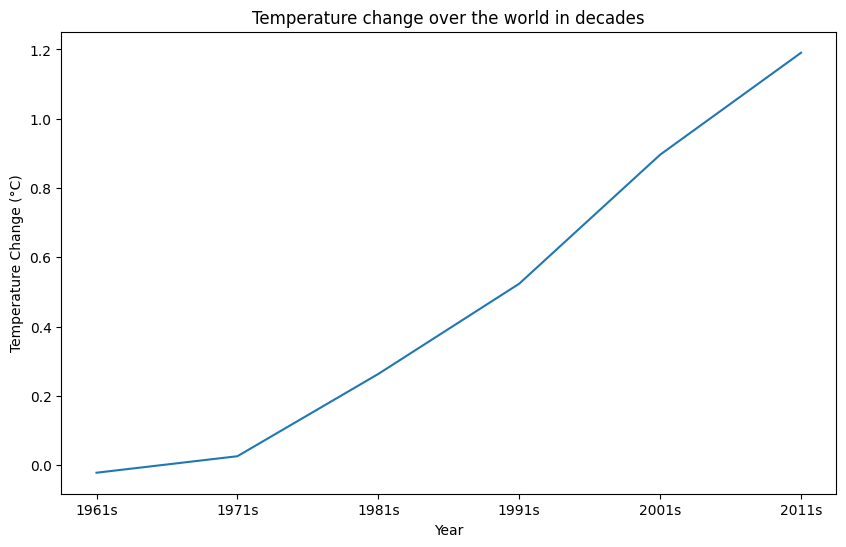

In [59]:
# We can see the temperature changes decade-wise globally
# using the line plot
worldplot(False)

It seems there is indeed an accelerating trend after the 70s. To make sure of the significance of this trend, I'll perform one-way ANOVA test.

In [78]:
def anova(x, y):
    f_statistic, p_value = stats.f_oneway(x, y)
    print(f"F-statistic: {f_statistic:.4f}, P-value: {p_value:}")
    
    # Check the result
    if p_value < 0.05:
        print("Reject the null hypothesis: There is a significant difference in temperature changes across decades.")
    else:
        print("Fail to reject the null hypothesis: No significant difference in temperature changes across decades.")

In [79]:
# Global Average data
data = df_world[['1961s', '1971s', '1981s', '1991s', '2001s', '2011s']]
decades = [x for x in range(1961, 2021, 10)]

anova(decades, data.values)

F-statistic: 67536.3898, P-value: 1.7503168159953545e-20
Reject the null hypothesis: There is a significant difference in temperature changes across decades.


In [99]:
# Regional data
data = df_region.drop(columns=[str(year) for year in range(1961,2024)])
data = data.reset_index()
data.columns = ['Region', '1961', '1971', '1981', '1991', '2001', '2011']
reg_data = pd.melt(data, id_vars=['Region'], 
                  var_name='Decade', 
                  value_name='Temperature Change')
anova(reg_data['Decade'], reg_data['Temperature Change'])

F-statistic: 391700.6229, P-value: 9.125543162505424e-113
Reject the null hypothesis: There is a significant difference in temperature changes across decades.


In [104]:
# Country data
data = df.drop(columns=[str(year) for year in range(1961,2024)])
data = data.drop(columns=['ISO2', 'ISO3', 'Region'])
data.columns = ['Country', '1961', '1971', '1981', '1991', '2001', '2011']
country_data = pd.melt(data, id_vars=['Country'], 
                      var_name='Decade', 
                      value_name='Temperature Change')
anova(country_data['Decade'], country_data['Temperature Change'])

F-statistic: 18460739.2929, P-value: 0.0
Reject the null hypothesis: There is a significant difference in temperature changes across decades.


The results of the ANOVA tests show extremely high **F-statistic** values and **p-values close to 0** (or exactly 0) across the different sets of data indicate a very strong statistical significance.

**1. World Average Temperature Change Data**
- F-statistic: 67536.3898
- P-value: 1.7503168159953545e-20

Finding:
- The extremely high F-statistic and the near-zero p-value suggest that the average temperature change across the decades is **significantly different**. This means the data strongly supports that temperature change has varied across the decades on a global scale.
  
**2. Regional Average Temperature Change Data**
- F-statistic: 391700.6229
- P-value: 9.125543162505424e-113

Finding:
- This is an even more extreme result than the world average. The high F-statistic and extremely small p-value indicate that the differences in temperature change across the decades **within the regions** (e.g., Europe, Asia, Africa) are also highly significant. The temperature change pattern is not uniform, and different regions have experienced distinct changes over time.

**3. Country-Specific Temperature Change Data**
- F-statistic: 18460739.2929
- P-value: 0.0

Finding:
- This result is the most extreme, with an exceptionally high F-statistic and a p-value of 0. This means that temperature changes across the decades for individual countries are **highly distinct**, much more so than at the regional or global level. There are very pronounced differences in temperature change trends across countries, indicating that some countries may have experienced significantly faster or slower changes over time.

### Conclusion:
Across all three tests (world, regional, and country levels), the **null hypothesis**—that there is no difference in temperature change across decades—is **strongly rejected**. The **decades differ significantly in terms of temperature change**, both globally, regionally, and especially at the country level.

### Key Insights:
- **Globally**, temperature change trends show significant variation across decades.
- **Regionally**, this variation is even more pronounced, suggesting that different regions have distinct patterns of climate change.
- **At the country level**, the variation is at its peak, meaning different countries have experienced temperature changes at vastly different rates.

### The Third Hypothesis

The Null hypothesis (**H₀**) says there is no significant difference in the temperature increases between regions with higher industrial activity and regions with lower industrial activity.

The Alternative hypothesis (**H₁**) says the regions with higher industrial activity have experienced larger temperature increases compared to regions with lower industrial activity.

To perform the significance test, we need to categorize each of the five regions into high or low-industrial activity regions. To categorize these regions, we can look into several factors such as GDP, energy consumption, or industrial output. Based on that, we can approximate that regions with **High Industrial Activity** include `Europe`, `Asia`, and `Americas`. On the other hand, the region with **Low Industrial Activity** includes `Africa` and `Oceania`.

In [105]:
# collective test
# Europe, Asia, and Americas VS Africa and Oceania
test((europe+asia+americas)/3, (africa+oceania)/2)

t_value1 = 1.5437, p_value1 = 0.1250
We fail to reject the null hypothesis: no significant difference found.


In [107]:
# single test
print('Europe vs Africa')
test(europe, africa)
print('\nEurope vs Oceania')
test(europe, oceania)

Europe vs Africa
t_value1 = 1.4429, p_value1 = 0.1514
We fail to reject the null hypothesis: no significant difference found.

Europe vs Oceania
t_value1 = 3.5155, p_value1 = 0.0006
We reject the null hypothesis: there is a significant difference between temperature changes in polar and equatorial regions.


In [108]:
# single test
print('Asia vs Africa')
test(asia, africa)
print('\nAsia vs Oceania')
test(asia, oceania)

Asia vs Africa
t_value1 = -0.2625, p_value1 = 0.7933
We fail to reject the null hypothesis: no significant difference found.

Asia vs Oceania
t_value1 = 2.1883, p_value1 = 0.0304
We reject the null hypothesis: there is a significant difference between temperature changes in polar and equatorial regions.


In [109]:
# single test
print('America vs Africa')
test(americas, africa)
print('\nAmerica vs Oceania')
test(americas, oceania)

America vs Africa
t_value1 = -0.6342, p_value1 = 0.5270
We fail to reject the null hypothesis: no significant difference found.

America vs Oceania
t_value1 = 2.2501, p_value1 = 0.0261
We reject the null hypothesis: there is a significant difference between temperature changes in polar and equatorial regions.


### Summary of Results:
1. When using the average value of both categories (high vs. low industrial activity regions):
   - We **failed to reject the null hypothesis**, meaning there is **no statistically significant difference** in temperature increases between the two groups as a whole.

2. When using the individual values of each region in both categories:
   - **High industrial activity regions** (Europe, Asia, Americas) **failed to reject the null hypothesis** when compared to **Africa**.
   - **High industrial activity regions** did **reject the null hypothesis** when compared to **Oceania**.

### Conclusion:
**1. No Significant Difference at the Aggregate Level**:
   - When grouping regions into "high" and "low" industrial activity categories and comparing the **average temperature change**, there is **no significant difference** in temperature increase between the two groups. This suggests that, as a broad category, regions with high industrial activity have not experienced temperature increases significantly different from regions with low industrial activity. 

**2. Regional-Level Differences**:
   - At the **individual region level**, the results differ:
     - There is **no significant difference** in temperature increases between high industrial activity regions (Europe, Asia, Americas) and **Africa**. This could indicate that Africa, despite being in the low industrial activity category, has experienced temperature changes similar to highly industrialized regions.
     - However, the **null hypothesis is rejected** when comparing high industrial activity regions to **Oceania**. This indicates that Oceania has experienced significantly different temperature changes (likely smaller increases), compared to the high industrial activity regions.

### Possible Explanations:
- **Africa’s temperature changes** could be influenced by factors other than industrial activity, such as geographical or climatic conditions (e.g., proximity to the equator, natural climate variability).
- **Oceania’s climate** may be more insulated from the effects of industrialization due to its geography (e.g., more oceanic influence, fewer densely populated industrial areas), leading to **less temperature change** compared to heavily industrialized regions.

## 7. Suggestions for Next Steps
   - **Further Investigation**: We might want to explore why Oceania stands out from other regions by analyzing specific climate factors affecting that region (e.g., oceanic currents, island geography).
   - **Broader Hypotheses**: We could expand our analysis to consider other variables, such as latitude bands, regional industrialization, or climate policies, to understand why some regions behave differently.
   - We might want to explore **post-hoc tests** (like Tukey's HSD) to identify **which specific decades** or **regions/countries** are significantly different from each other. This can give more insights into when and where the temperature changes were the most pronounced.
   - Since industrial activity alone does not fully explain the temperature differences, explore other variables like geographic location, urbanization, land use, or environmental policies that might contribute to regional temperature changes.

## 8. Summary of Data Quality and Request for Additional Data

The dataset used for this analysis provides valuable insights into global and regional temperature changes. It includes comprehensive records across decades, offering a solid foundation for evaluating trends in surface temperature. However, certain limitations need to be addressed to improve the analysis.

Firstly, while the data captures temperature changes well, the lack of detailed socio-economic and industrial activity metrics, such as energy consumption or industrial output, limits the ability to fully explain the differences in temperature trends across regions. As seen in the analysis, there was no significant difference in temperature increases when comparing high and low industrial activity regions as a whole, but notable differences emerged at the individual region level, particularly between high industrial regions and Oceania. This suggests that factors beyond industrial activity, such as geographic location and environmental policies, may play a crucial role.

To improve the robustness of the conclusions, additional data on regional industrial output, energy consumption, or even land use changes would be beneficial. Such data could help identify more precise drivers of temperature variation and strengthen the validity of the findings. In conclusion, while the current dataset is of high quality for observing temperature trends, supplementing it with industrial and socio-economic data would allow for a deeper analysis.

---
### Author: Herianto, S.Si.

Copyright © 2024 All rights reserved | Herianto

<!--
## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2024-09-27        | 1.0     | Herianto   | Creating the file       |
--!>